In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import data csv files
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City Data with the pandas library
city_data_df = pd.read_csv(city_data)
city_data_df.head()

#duplicate city so drop dups
#city_data_df = city_data_df.drop_duplicates('city')
#city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
# Read the Ride Data 
ride_data_df = pd.read_csv(ride_data)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
# Combine the cty and ride data
pyber_data = pd.merge(ride_data_df, city_data_df, on="city")
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [6]:
# Find the average fare per city
average_fare = pyber_data.groupby("city")["fare"].mean()
average_fare.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

## Bubble Plot of Ride Sharing Data

In [7]:
# Find the total rides per city.
total_rides = pyber_data.groupby("city")["ride_id"].count()
total_rides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [8]:
# Find the total number of drivers per city.
total_drivers = pyber_data.groupby("city")["driver_count"].mean()
total_drivers.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

In [11]:
## Find city type
city_type = city_data_df.set_index('city')['type']
city_type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [12]:
# Create Pandas DataFrame
pyber_cities = pd.DataFrame({"Average Fare per City":average_fare,
                 "Number of Rides": total_rides,
                 "Number of Drivers": total_drivers,
                 "City Type": city_type
})
pyber_cities.head()

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


<function matplotlib.pyplot.show(*args, **kw)>

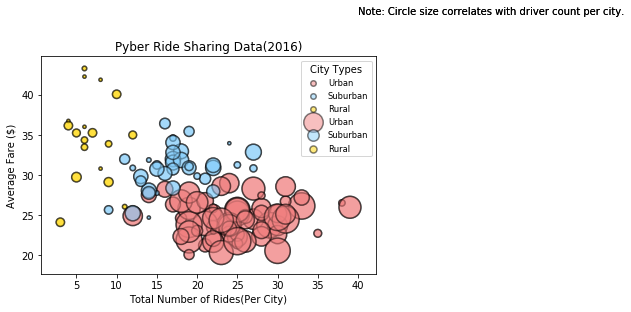

In [13]:
# Build the scatter plots for each city types
#Urban
urban = pyber_cities.loc[pyber_cities["City Type"]== "Urban"]

#suburban
suburban = pyber_cities.loc[pyber_cities["City Type"]== "Suburban"]

#rural
rural = pyber_cities.loc[pyber_cities["City Type"]== "Rural"]

# Incorporate the other graph properties
#Urban
plt.scatter(urban["Number of Rides"], urban["Average Fare per City"], color = "lightcoral", 
            edgecolors="black", s = urban["Number of Drivers"]*10, label = "Urban", alpha = 0.5, linewidth = 1.5)

#Suburban
plt.scatter(suburban["Number of Rides"], suburban["Average Fare per City"], color = "lightskyblue", 
            edgecolors ="black", s = suburban["Number of Drivers"]*10, label = "Suburban", alpha = 0.5, linewidth = 1.5)

#Rural
plt.scatter(rural["Number of Rides"], rural["Average Fare per City"], color = "gold", 
            edgecolors = "black", s = rural["Number of Drivers"]*10, label = "Rural", alpha = 0.5, linewidth = 1.5)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded",
                 numpoints=1, scatterpoints=1, loc= "upper right",title="City Types")

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")
plt.text(40, 50,"Note: Circle size correlates with driver count per city.")
plt.grid()
# Build the scatter plots for each city types
#Urban
urban = pyber_cities.loc[pyber_cities["City Type"]== "Urban"]

#suburban
suburban = pyber_cities.loc[pyber_cities["City Type"]== "Suburban"]

#rural
rural = pyber_cities.loc[pyber_cities["City Type"]== "Rural"]

# Incorporate the other graph properties
#Urban
plt.scatter(urban["Number of Rides"], urban["Average Fare per City"], color = "lightcoral", 
            edgecolors="black", s = urban["Number of Drivers"]*10, label = "Urban", alpha = 0.5, linewidth = 1.5)

#Suburban
plt.scatter(suburban["Number of Rides"], suburban["Average Fare per City"], color = "lightskyblue", 
            edgecolors ="black", s = suburban["Number of Drivers"]*10, label = "Suburban", alpha = 0.5, linewidth = 1.5)

#Rural
plt.scatter(rural["Number of Rides"], rural["Average Fare per City"], color = "gold", 
            edgecolors = "black", s = rural["Number of Drivers"]*10, label = "Rural", alpha = 0.5, linewidth = 1.5)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded",
                 numpoints=1, scatterpoints=1, loc= "upper right",title="City Types")

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")
plt.text(40, 50,"Note: Circle size correlates with driver count per city.")
plt.grid()

plt.show


## Total Fares by City Type

Text(0.5, 1.0, '% of Total Fares by City Type')

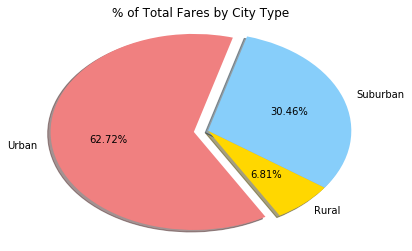

In [14]:

# Calculate Type Percents
#Sum of fares by city type.

city_fare_pie = pyber_data.groupby(["type"])["fare"].sum()
city_fare_pie

# Build Pie Chart
#Use the City Pie index for wedge labels.

city_fare_pie.index

#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

#Only explode the third section of the pie chart.

explode = (0,0, 0.1)

#Create the pie chart.
plt.pie(city_fare_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, 
        shadow = True, startangle = 300)

#Tell Matplotlib that we want a pie chart with equal axes.
plt.axis("auto")

#Add the legend.
#plt.legend(loc = "upper right")

plt.title("% of Total Fares by City Type")



## Total Rides by City Type

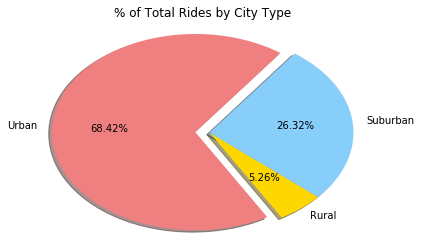

In [16]:
# Calculate Ride Percents

#Total rides by city type.

city_rides_pie = pyber_data.groupby(["type"])["ride_id"].count()
city_rides_pie

#Use the City Pie index for wedge labels.
city_rides_pie.index

#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

#Only explode the first section of the pie chart.
explode = (0,0,0.1)

#Create the pie chart.
plt.pie(city_rides_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, 
        shadow = True, startangle = 300)

#Tell Matplotlib that we wnat the pie chart to have equal axes.
plt.axis("auto")

#Add the legend.
#plt.legend(loc = "upper right")
plt.title("% of Total Rides by City Type")

# Show Figure
plt.show()

## Total Drivers by City Type

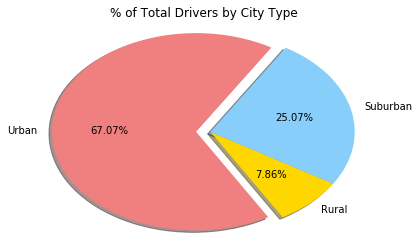

In [17]:
# Calculate Driver Percents
#Total driver count.

city_drivers_pie = pyber_data.groupby(["type"])["driver_count"].mean()
city_drivers_pie

#Use the City Pie index for the wedge labels.
city_drivers_pie.index

#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

#explode the first and second segments of the pie chart.

explode = (0,0,0.1)

#Create the pie chart.
plt.pie(city_drivers_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, 
        shadow = True, startangle = 300)

#Tell Matplotlib that we want the chart to have equal axes.
plt.axis("auto")

#Add the legend.
#plt.legend(loc = "upper right")
plt.title("% of Total Drivers by City Type")

# Show Figure
plt.show()



In [ ]:
Observations:
    
    The largest percentage of fare by city type is urban
    The largest percentage of total rides by city type is urban
    The largest perentage of total drivers by city type is urban